In [1]:
from pathlib import Path

In [2]:
repo_dir = Path.cwd().parents[0]
repo_dir

PosixPath('/Users/ftod/GitHub/heart-disease')

In [7]:
import sys

sys.path.insert(0, f"{repo_dir}")

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

import heart_disease.constants as hdc
import heart_disease.data.get_dataset as hddgd

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

py.offline.init_notebook_mode(connected=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [5]:
hddgd.get_dataset()
combined_df = hddgd.validate_and_combine_dataset()

Data files already downloaded.


In [6]:
print(combined_df.shape)
combined_df.head()

(920, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,source,target
0,63,male,typical angina,145,233,high fasting blood sugar,left ventricular hypertrophy,150,no exercise induced angina,2.3,downsloping,0,fixed defect,cleveland,0
1,67,male,asymptomatic,160,286,low fasting blood sugar,left ventricular hypertrophy,108,exercise induced angina,1.5,flat,3,normal,cleveland,1
2,67,male,asymptomatic,120,229,low fasting blood sugar,left ventricular hypertrophy,129,exercise induced angina,2.6,flat,2,reversable defect,cleveland,1
3,37,male,non-anginal pain,130,250,low fasting blood sugar,normal,187,no exercise induced angina,3.5,downsloping,0,normal,cleveland,0
4,41,female,atypical angina,130,204,low fasting blood sugar,left ventricular hypertrophy,172,no exercise induced angina,1.4,upsloping,0,normal,cleveland,0


# Generate datasets

In [45]:
df = combined_df

Adults = df[(df["age"] >= 29) & (df["age"] <= 33)]
Middle_Age = df[(df["age"] > 33) & (df["age"] <= 40)]
Senior = df[(df["age"] > 40) & (df["age"] <= 66)]
Retired = df[df["age"] > 66]

x_ = ["Adults", "Middle_Age", "Senior", "Retired"]
y_ = [len(Adults), len(Middle_Age), len(Senior), len(Retired)]

# Bar plot

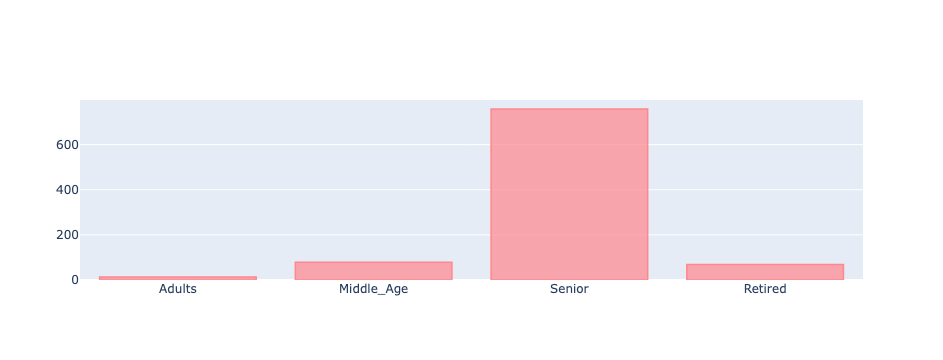

In [46]:
trace = go.Bar(
    x=x_,
    y=y_,
    textposition="auto",
    name="target 0",
    marker=dict(
        color="rgba(255, 135, 141,0.7)",
        line=dict(color="rgba(255, 135, 141,1)", width=1.5),
    ),
    opacity=1,
)

py.offline.iplot([trace], filename="bar-chart")

# Box plot

## Basic box plot

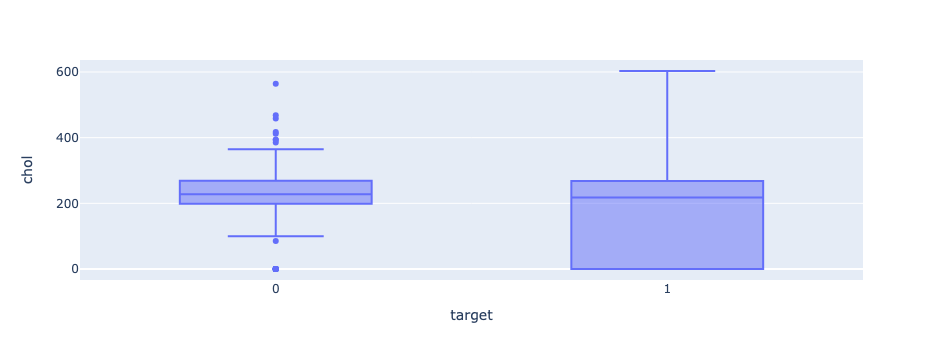

In [9]:
fig = px.box(combined_df, x="target", y="chol")
fig.show();

## Labeled box plot

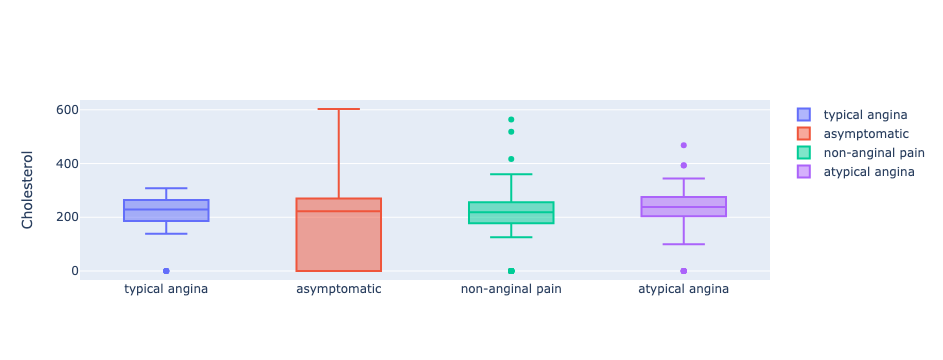

In [12]:
# First let's create a list to append the data to be plotted
data = []
for pain in combined_df["cp"].unique():
    data.append(go.Box(y=combined_df[combined_df["cp"] == pain].chol, name=str(pain)))

layout = go.Layout(yaxis=dict(title="Cholesterol", zeroline=False))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, show_link=False)

# Histogram

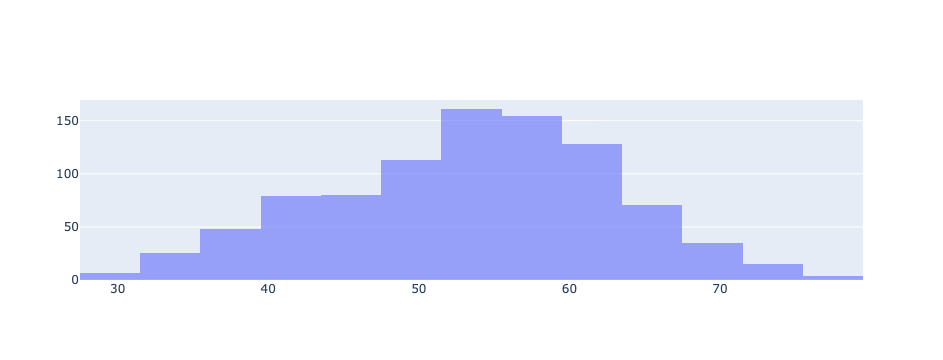

In [10]:
layout = go.Layout(barmode="overlay")
data = go.Histogram(x=combined_df["age"], opacity=0.6, xbins={"size": 4})
fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

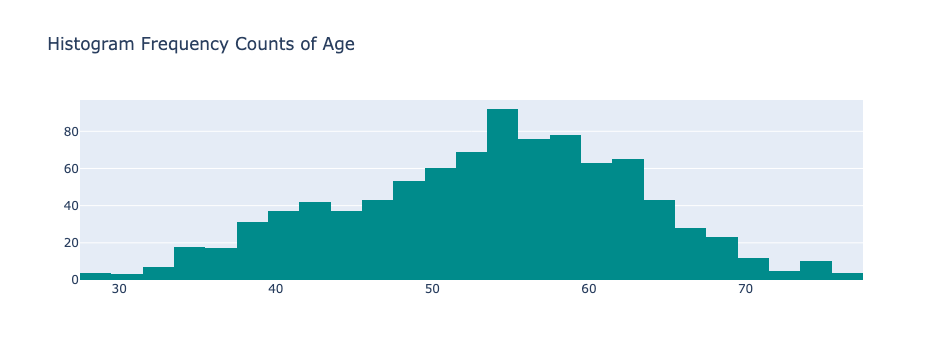

In [40]:
trace = go.Histogram(x=combined_df["age"], name="age", marker=dict(color="darkcyan"))

layout = go.Layout(title="Histogram Frequency Counts of Age")

fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig, filename="histogram-freq-counts of ")

# Pie plot

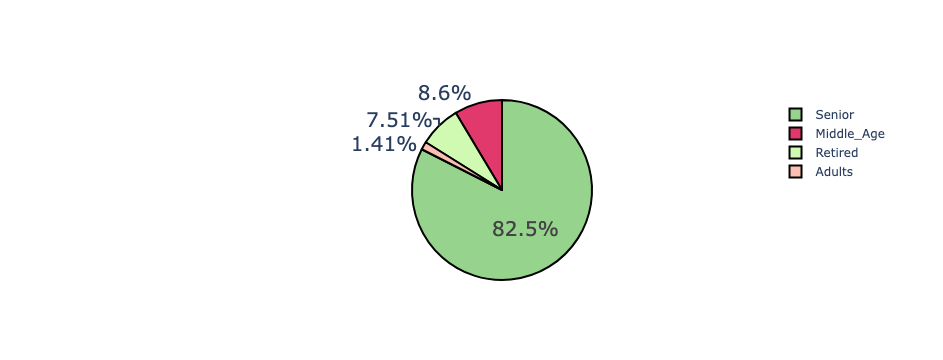

In [48]:
colors = ["#FEBFB3", "#E1396C", "#96D38C", "#D0F9B1"]

trace = go.Pie(
    labels=x_,
    values=y_,
    hoverinfo="label+percent",
    textfont=dict(size=20),
    marker=dict(colors=colors, line=dict(color="#000000", width=2)),
)

py.offline.iplot([trace], filename="pie-chart")

# Scatter plot

## Basic scatter plot

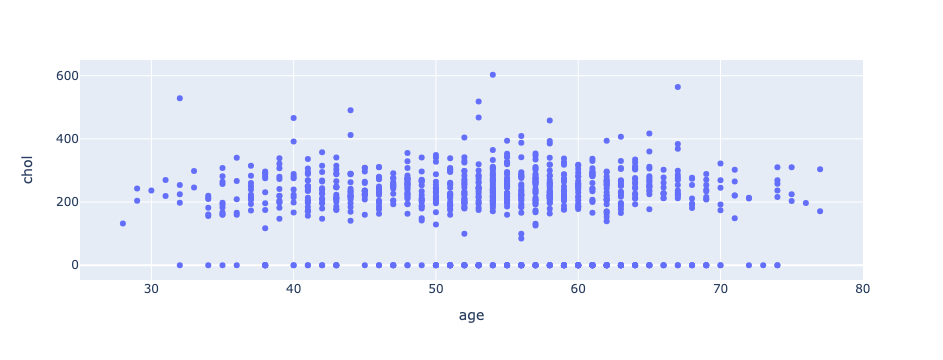

In [19]:
px.scatter(combined_df, x="age", y="chol")

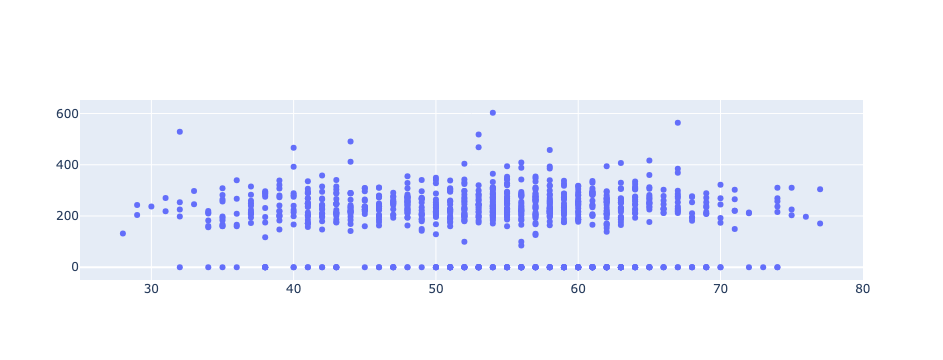

In [15]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=combined_df["age"],
        y=combined_df["chol"],
        # mode='markers+lines',
        mode="markers",
        name="chol v age",
    )
)

## Scatter plot with hover data and marker size

In [34]:
combined_df.dtypes

age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak      float64
slope       category
ca             Int64
thal        category
source        object
target         int64
dtype: object

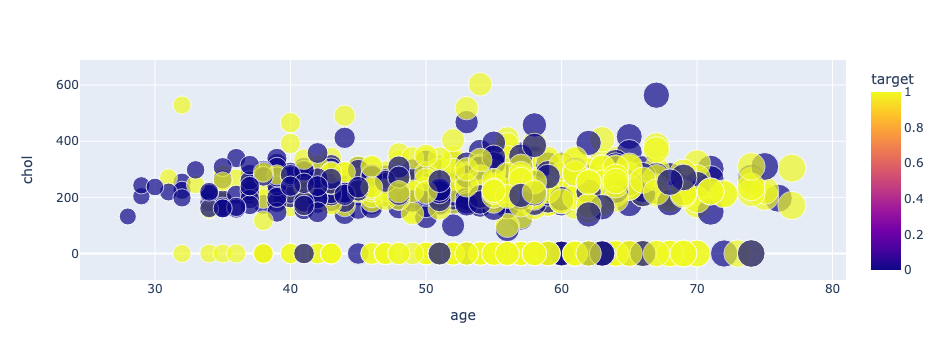

In [36]:
temp_df = combined_df.copy(deep=True)
temp_df["age"] = temp_df["age"].astype(int)
px.scatter(
    temp_df,
    x="age",
    y="chol",
    color="target",
    hover_data=["trestbps", "exang"],
    size="age",
)

## Scatter plot with fixed marker size

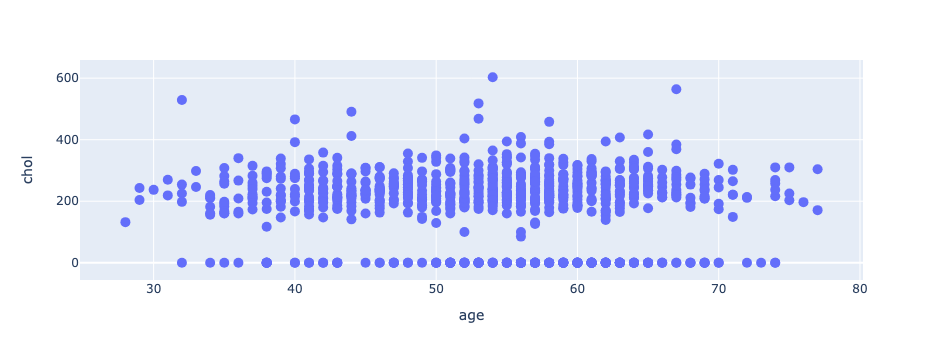

In [37]:
fig = px.scatter(combined_df, x="age", y="chol")
fig.update_traces(marker={"size": 10})

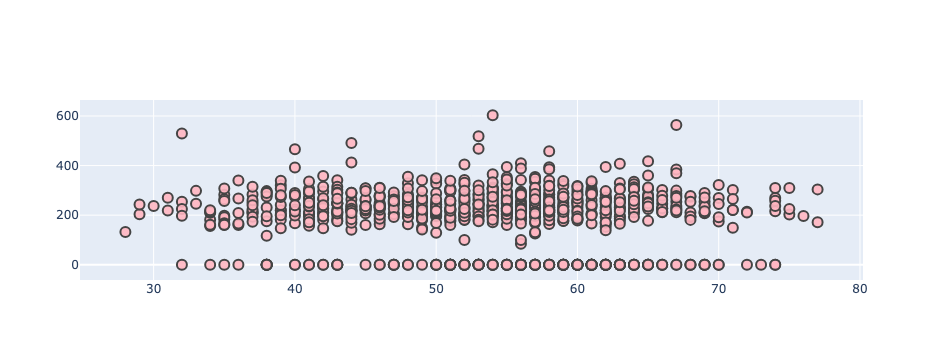

In [49]:
df = combined_df

trace = go.Scatter(
    x=df["age"],
    y=df["chol"],
    mode="markers",
    marker=dict(
        size=10,
        color="rgba(255, 182, 193, .9)",
        line=dict(
            width=2,
        ),
    ),
)

data = [trace]

# Plot and embed in ipython notebook!
py.offline.iplot(data, filename="scatter")

In [ ]:
https://colab.research.google.com/github/gretelai/gretel-blueprints/blob/main/docs/notebooks/balance_uci_heart_disease.ipynb